# Title

### **Can machine learning models accurately predict maternal health risk based on physiological features?**

---

## Summary

This project aims to use machine learning to predict maternal health risk based on key physiological factors. Maternal health are a major concern in healthcare. Hence, early risk assessment is crucial for the welfare of both the mother and child. By leveraging structured data from the Maternal Health Risk Dataset, we trained and evaluated machine learning models to classify maternal health risk levels into three different classes: low, mid, and high risk categories.

The dataset contains 1,014 records with features such as age, blood pressures, blood sugar levels, body temperature and heart rate. Our goal will be to determine whether machine learning algorithms could accurately predict risk levels based on these physiological markers and aid medical experts.

We will carry out exploratory data analysis, feature engineering and preprocessing to the dataset and then apply multiple classification models including logistic regression, decision trees,___________, We might also carry out hyperparameter optimization and finally evaluate their accuracy and other classification metrics such as precision, recall, F1-score, and AUC-ROC.

---

## Introduction


Maternal health is a critical area of healthcare, as complications during pregnancy and childbirth can have severe consequences for both mothers and newborns. Conditions such as hypertension, gestational diabetes, and abnormal heart rate patterns can indicate a higher risk of complications. Historically, risk assessment have been carried out by medical professionals that relied heavily on clinical expertise and constant monitoring. However, since the boom of machine learning, it began to offer a data-driven approach to enhance early detection and intervention, all while minimizing the involvement of overworked medical professionals.

The dataset that we will be using to develop this ML model will consist in analyzing the following features for each patient:
- `Age`: Age of the patient (in years).
- `SystolicBP`: Systolic Blood Pressure (mmHg).
- `DiastolicBP`: Diastolic Blood Pressure (mmHg).
- `BS (Blood Sugar Level)`: Blood sugar concentration (mmol/L).
- `BodyTemp`: Body temperature (°F).
- `HeartRate`: Heart rate (beats per minute).
- `RiskLevel`: The target variable, categorized into low risk, mid risk, and high risk.

---

## Methods & Results


- describe in written english the methods you used to perform your analysis from beginning to end that narrates the code the does the analysis.
- your report should include code which:
    - loads data from the original source on the web
    - wrangles and cleans the data from it’s original (downloaded) format to the format necessary for the planned classification or clustering analysis
    - performs a summary of the data set that is relevant for exploratory data analysis related to the planned classification analysis
    - creates a visualization of the dataset that is relevant for exploratory data analysis related to the planned classification analysis
    - performs classification or regression analysis
    - creates a visualization of the result of the analysis
    
note: all tables and figure should have a figure/table number and a legend

In [20]:
library(tidyverse)
library(corrplot)
# install.packages('corrplot')

data <- read_csv("data/Maternal Health Risk Data Set.csv")


corrplot 0.95 loaded



Rows: 1014 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): RiskLevel
dbl (6): Age, SystolicBP, DiastolicBP, BS, BodyTemp, HeartRate

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


### Wrangling and Cleaning the data
There are no NA values in our dataset. 'Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', and 'HeartRate' are numerical values. 'RiskLevel' is currently a character variable.

In [7]:
head(data)
colSums(is.na(data))
str(data)

Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
25,130,80,15.00,98,86,high risk
35,140,90,13.00,98,70,high risk
29,90,70,8.00,100,80,high risk
30,140,85,7.00,98,70,high risk
35,120,60,6.10,98,76,low risk
23,140,80,7.01,98,70,high risk


Age  SystolicBP DiastolicBP          BS    BodyTemp   HeartRate 
          0           0           0           0           0           0 
  RiskLevel 
          0

spc_tbl_ [1,014 × 7] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Age        : num [1:1014] 25 35 29 30 35 23 23 35 32 42 ...
 $ SystolicBP : num [1:1014] 130 140 90 140 120 140 130 85 120 130 ...
 $ DiastolicBP: num [1:1014] 80 90 70 85 60 80 70 60 90 80 ...
 $ BS         : num [1:1014] 15 13 8 7 6.1 7.01 7.01 11 6.9 18 ...
 $ BodyTemp   : num [1:1014] 98 98 100 98 98 98 98 102 98 98 ...
 $ HeartRate  : num [1:1014] 86 70 80 70 76 70 78 86 70 70 ...
 $ RiskLevel  : chr [1:1014] "high risk" "high risk" "high risk" "high risk" ...
 - attr(*, "spec")=
  .. cols(
  ..   Age = col_double(),
  ..   SystolicBP = col_double(),
  ..   DiastolicBP = col_double(),
  ..   BS = col_double(),
  ..   BodyTemp = col_double(),
  ..   HeartRate = col_double(),
  ..   RiskLevel = col_character()
  .. )
 - attr(*, "problems")=<externalptr> 


There are three risk levels: 'low risk', 'mid risk', and 'high risk'. For further analysis, we modify the RiskLevel to a factor variable. Additionally, we observe the summary statistics for each variable to get a sense of the distributions.

In [15]:
data %>% distinct(RiskLevel)
data_clean <- data %>% 
    mutate(RiskLevel = factor(RiskLevel, levels = c("low risk", "mid risk", "high risk")))

summary(data_clean)

RiskLevel
<chr>
high risk
low risk
mid risk


      Age          SystolicBP     DiastolicBP           BS        
 Min.   :10.00   Min.   : 70.0   Min.   : 49.00   Min.   : 6.000  
 1st Qu.:19.00   1st Qu.:100.0   1st Qu.: 65.00   1st Qu.: 6.900  
 Median :26.00   Median :120.0   Median : 80.00   Median : 7.500  
 Mean   :29.87   Mean   :113.2   Mean   : 76.46   Mean   : 8.726  
 3rd Qu.:39.00   3rd Qu.:120.0   3rd Qu.: 90.00   3rd Qu.: 8.000  
 Max.   :70.00   Max.   :160.0   Max.   :100.00   Max.   :19.000  
    BodyTemp        HeartRate        RiskLevel  
 Min.   : 98.00   Min.   : 7.0   low risk :406  
 1st Qu.: 98.00   1st Qu.:70.0   mid risk :336  
 Median : 98.00   Median :76.0   high risk:272  
 Mean   : 98.67   Mean   :74.3                  
 3rd Qu.: 98.00   3rd Qu.:80.0                  
 Max.   :103.00   Max.   :90.0                  

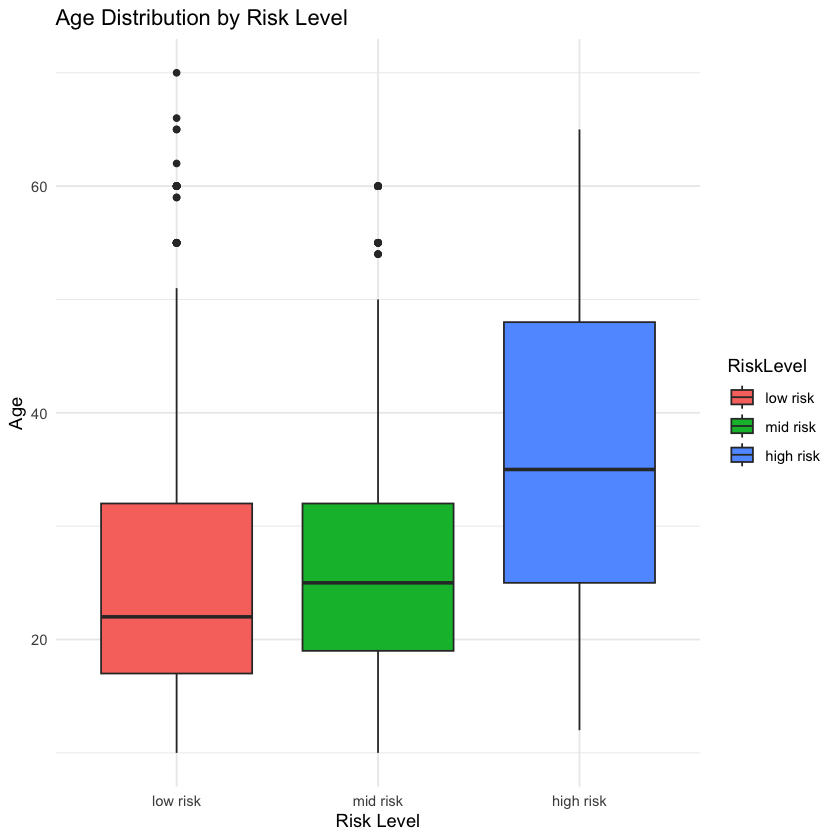

In [16]:
ggplot(data_clean, aes(x = RiskLevel, y = Age, fill = RiskLevel)) +
  geom_boxplot() +
  theme_minimal() +
  labs(title = "Age Distribution by Risk Level",
       x = "Risk Level",
       y = "Age")

Since age is an important factor in maternal health, we visualize the age distribution by risk level.

From the visualization, high risk individuals have a higher median age around 35 years old. Additionally, the interquartile range indicates that the high risk group has more variation in age. 

We observe some outliers in the low and mid risk groups. Based on the visualization, older aged individuals seem more associated with maternal health risks. 

For further exploration, we plot plot for each variable.

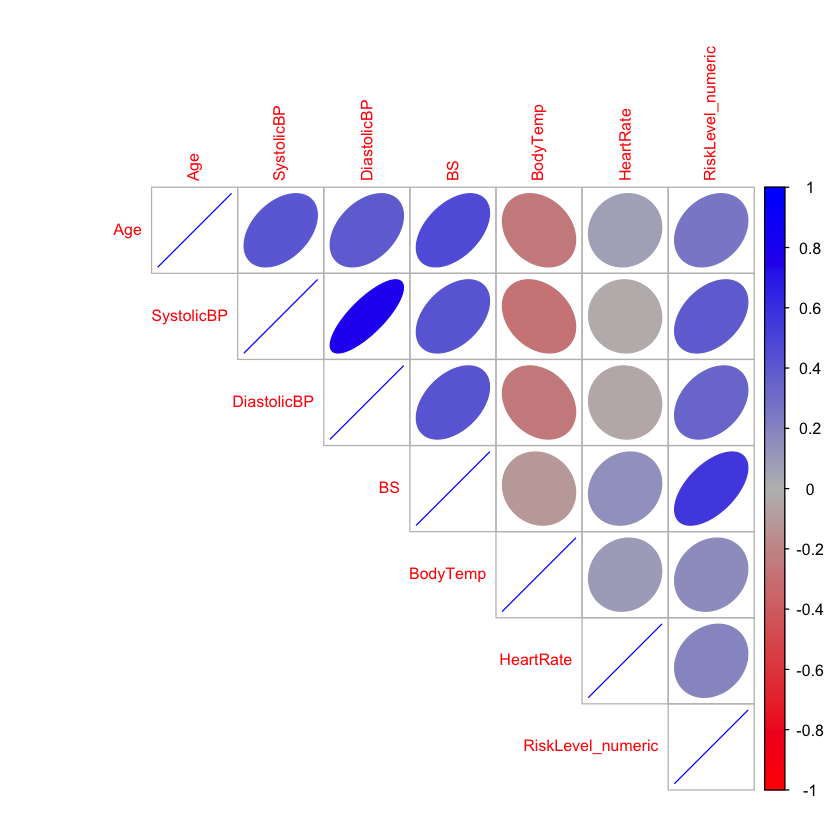

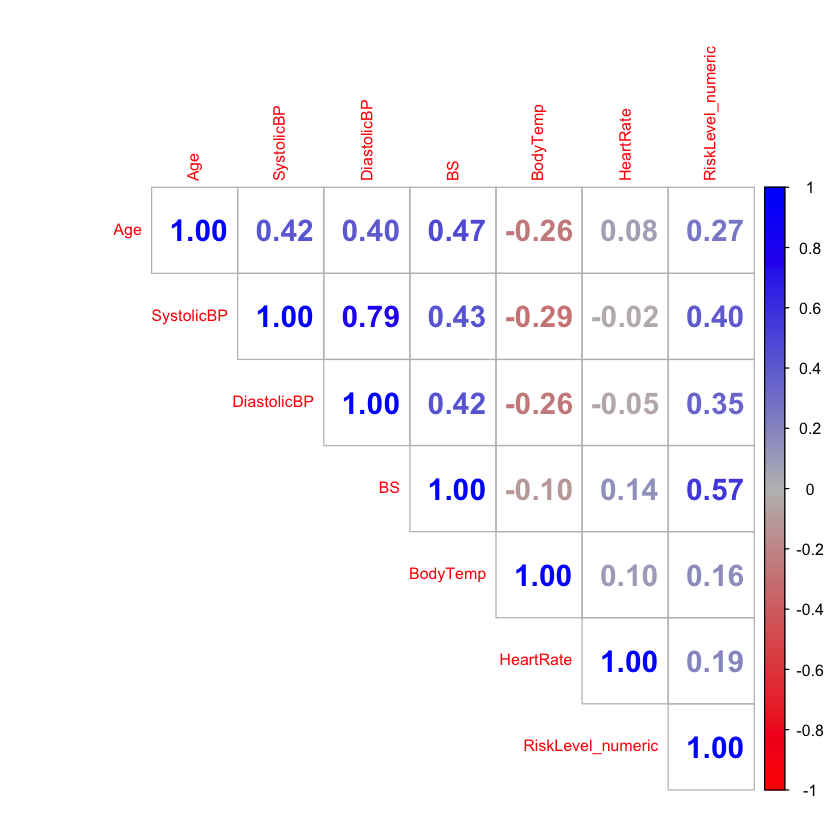

In [30]:
# Temporarily change RiskLevel to numerical values
data_numeric <- data_clean %>%
  mutate(RiskLevel_numeric = as.numeric(RiskLevel)) %>%
  select(-RiskLevel) # remove the original factor variable

cor_matrix <- cor(data_numeric)

corrplot(cor_matrix, method = "ellipse", type = "upper", tl.cex = 0.8, 
    col = colorRampPalette(c("red", "grey", "blue"))(200))
corrplot(cor_matrix, method = "number", type = "upper", number.cex = 1.5, tl.cex = 0.8, 
    col = colorRampPalette(c("red", "grey", "blue"))(200))

All of the variables have a positive correlation with RiskLevel, indicating that increases in these variables generally correspond to a higher maternal health risk. BS (Blood Sugar level) has the strongest correlation of 0.57, suggesting it is likely to be the most influential factor. We thought age would have a stronger correlation with RiskLevel, however, systolic blood pressure and diastolic blood pressure seems to have a stronger correlation with RiskLevel than age. 

These findings may be a possible reason for the outliers observed above. Younger individuals with high blood pressures or sugar levels may be classified into higher risk levels. This indicates the importance of other factors.

---

## Discussion


- summarize what you found
- discuss whether this is what you expected to find?
- discuss what impact could such findings have?
- discuss what future questions could this lead to?

---

## References

- at least 4 citations relevant to the project (format is your choose, just be consistent across the references).